In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from gutenberg.cleanup import strip_headers
import flair
import spacy
nlp = spacy.load('en')

C:\Users\kevin\AppData\Local\conda\conda\envs\tic-psy\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [15]:
plt.rcParams['figure.figsize'] = 16,10
np.random.seed(0)
#sns.set(rc={'figure.figsize':(16,10)})
#sns.set(font_scale=1.5)

In [75]:
from collections import *
from os import linesep as EOL
import seaborn as sns

In [3]:
with open('pg4693_FamousAffinitiesOfHistory.txt') as f:
    lines = [l.strip() for l in f.readlines()]
    whole_txt = EOL.join(l for l in lines if l)
    whole_txt = strip_headers(whole_txt)
print(len(whole_txt), "chars")

775888 chars


In [64]:
def clean_title(t):
    t = re.sub('THE STORY OF', '', t)
    t = re.sub('THE MYSTERY OF', '', t)
    return t.strip()
    

stories = whole_txt.split(EOL)[5:39]
subjects = EOL.join(clean_title(s) for s in stories)
subjects = set(e.text for e in nlp(subjects).ents)
subjects -= {''}
subjects

{'AARON BURR',
 'ADRIENNE LECOUVREUR',
 'BAVARIA',
 'BLESSINGTON',
 'BYRON',
 'CARLYLES',
 'CHARLES DICKENS',
 'CHARLES II',
 'CHARLES READE',
 'CHARLOTTE',
 'CHRISTINA OF',
 'DE STAEL',
 'DEAN',
 'EVELINA HANSKA',
 'FERDINAND LASSALLE',
 'FERSEN',
 'FITZHERBERT',
 'GEORGE IV',
 'GWYN',
 'HELOISE',
 'HONORE DE',
 'HOUSTON',
 'HUGOS',
 'KARL',
 'LAURA SEYMOUR',
 'LEON',
 'LEON GAMBETTA',
 'LOLA',
 'LUDWIG OF',
 'MARIE ANTOINETTE',
 'MARIE WALEWSKA',
 'MARY GODWIN',
 'MARY QUEEN',
 'MRS',
 'PAULINE',
 'PERCY BYSSHE',
 'PRINCE CHARLES EDWARD',
 'PRINCE POTEMKIN',
 'SAND',
 'THE COUNTESS GUICCIOLI\r\nMME',
 'THE EARL OF LEICESTER',
 'THE EMPRESS MARIE LOUISE',
 'TWO'}

In [4]:
doc = nlp(whole_txt)

In [83]:
ent_counter = Counter()
for i, ent in enumerate(doc.ents):
    if ent.label_ != 'PERSON':
        continue
        
    ent_name = ' '.join(ent.text.strip().split()).upper()
    ent_counter[ent_name] += 1


In [84]:
df = pd.DataFrame([(k,v) for k, v in ent_counter.most_common() if v > 5])
df.columns = ['Entity', 'Freq']
df['IsSubject'] = df.Entity.isin(subjects)
df

,Entity,Freq,IsSubject
0,BURR,68,False
1,DICKENS,48,False
2,ABELARD,45,False
3,CARLYLE,44,False
4,BYRON,39,True
5,BALZAC,38,False
6,MARX,38,False
7,GEORGE SAND,37,False
8,CHARLES,35,False
9,PAULINE,33,True


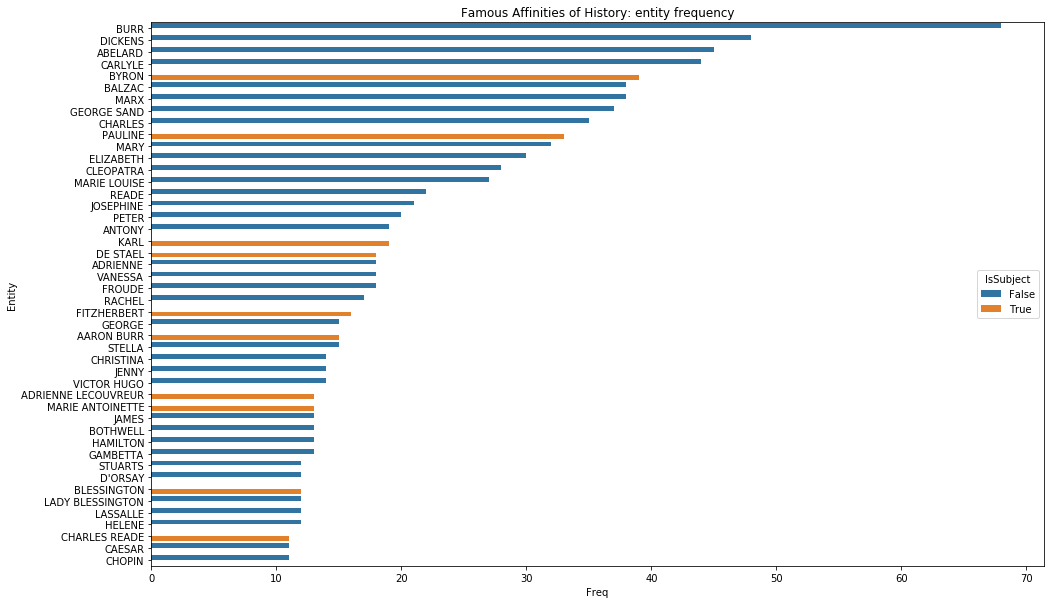

In [79]:
#df.plot(kind='bar', x='Entity', y='Freq', c='IsSubject')
sns.barplot(data=df[df.Freq > 10], x='Freq', y='Entity', hue='IsSubject')
plt.title('Famous Affinities of History: entity frequency')
plt.show()

In [95]:
from spacy.symbols import nsubj, VERB, ADJ

sym_lbl = {VERB: "VERB", ADJ: "ADJ"}

L = []

for possible_subject in doc:
    if possible_subject.dep == nsubj and possible_subject.text.upper() in ent_counter.keys():
        if possible_subject.head.pos == VERB:
            pos_lbl = sym_lbl[possible_subject.head.pos]
            print(f"{possible_subject.text:12} {possible_subject.head.text:10}({pos_lbl})")
            L.append((possible_subject.text, possible_subject.head.text, pos_lbl))
    if possible_subject.pos == ADJ and possible_subject.head.text.upper() in ent_counter.keys():
        pos_lbl = sym_lbl[possible_subject.pos]
        print(f"{possible_subject.head.text:12} {possible_subject.text:10}({pos_lbl})")
        L.append((possible_subject.head.text, possible_subject.text, pos_lbl))



Antony       deserted  (VERB)
Kings        incurred  (VERB)
queen        Egyptian  (ADJ)
place        first     (ADJ)
place        second    (ADJ)
Cleopatra    was       (VERB)
Cleopatra    succeeded (VERB)
water        blue      (ADJ)
Ferrero      likened   (VERB)
Caesar       arrived   (VERB)
man          greatest  (ADJ)
queen        Egyptian  (ADJ)
Cleopatra    had       (VERB)
Caesar       was       (VERB)
Cleopatra    came      (VERB)
Cleopatra    remained  (VERB)
character    her       (ADJ)
Ferrero      seems     (VERB)
Caesar       left      (VERB)
character    their     (ADJ)
man          young     (ADJ)
Antony       receiving (VERB)
Cleopatra    wavered   (VERB)
man          young     (ADJ)
man          mere      (ADJ)
Antony       wore      (VERB)
man          able      (ADJ)
man          rough     (ADJ)
Cleopatra    was       (VERB)
Cleopatra    lay       (VERB)
Antony       sent      (VERB)
Cleopatra    was       (VERB)
Antony       addressed (VERB)
Cleopatra    took      

Mary         showed    (VERB)
queen        heroic    (ADJ)
character    her       (ADJ)
Bothwell     came      (VERB)
Mary         knew      (VERB)
Darnley      shrunk    (VERB)
Mary         felt      (VERB)
queen        cruel     (ADJ)
man          worked    (VERB)
Mary         were      (VERB)
Darnley      held      (VERB)
queen        was       (VERB)
Mary         summoned  (VERB)
Bothwell     was       (VERB)
Mary         wrote     (VERB)
Mary         committing(VERB)
Bothwell     was       (VERB)
Mary         surrendered(VERB)
Mary         disguised (VERB)
queen        passed    (VERB)
Douglas      met       (VERB)
Mary         was       (VERB)
Bothwell     be        (VERB)
Frederick    made      (VERB)
Mary         been      (VERB)
love         great     (ADJ)
queen        is        (VERB)
Bothwell     went      (VERB)
touched      least     (ADJ)
CHRISTINA    is        (VERB)
Stockholm    ranked    (VERB)
kings        Swedish   (ADJ)
England      was       (VERB)
queen        th

Alfieri      died      (VERB)
prince       chivalrous(ADJ)
prince       young     (ADJ)
Highlanders  his       (ADJ)
Napoleon     resemble  (VERB)
Napoleon     made      (VERB)
place        high      (ADJ)
Elizabeth    lived     (VERB)
prince       young     (ADJ)
Frederick    shrank    (VERB)
place        bizarre   (ADJ)
place        civilized (ADJ)
place        oriental  (ADJ)
Frederick    was       (VERB)
Elizabeth    asked     (VERB)
lady         wrote     (VERB)
man          grown     (ADJ)
Peter        summon    (VERB)
little       its       (ADJ)
something    better    (ADJ)
Peter        was       (VERB)
Peter        was       (VERB)
Peter        striven   (VERB)
Elizabeth    tried     (VERB)
Catharine    resolved  (VERB)
Catharine    escaped   (VERB)
Catharine    turned    (VERB)
Orloff       was       (VERB)
weeks        few       (ADJ)
Peter        illustrious(ADJ)
love         be        (VERB)
Gudovitch    thrust    (VERB)
hand         her       (ADJ)
hand         own       

Fitzherbert  beautiful (ADJ)
George       met       (VERB)
hand         her       (ADJ)
George       sued      (VERB)
George       young     (ADJ)
man          furious   (ADJ)
man          gray      (ADJ)
man          old       (ADJ)
love         sincere   (ADJ)
Caroline     was       (VERB)
George       reigned   (VERB)
George       read      (VERB)
Fitzherbert  wished    (VERB)
house        own       (ADJ)
Thackeray    immortalized(VERB)
love         romantic  (ADJ)
ought        which     (ADJ)
house        contained (VERB)
love         romantic  (ADJ)
Charlotte    come      (VERB)
hand         other     (ADJ)
Marat        been      (VERB)
place        his       (ADJ)
place        only      (ADJ)
place        was       (VERB)
Charlotte    was       (VERB)
Marat        hideous   (ADJ)
Charlotte    real      (ADJ)
Charlotte    had       (VERB)
love         Your      (ADJ)
love         makes     (VERB)
place        your      (ADJ)
place        native    (ADJ)
Marat        was       (VER

Allen        was       (VERB)
Houston      was       (VERB)
hand         her       (ADJ)
Eliza        stands    (VERB)
Allen        seems     (VERB)
Trollope     described (VERB)
Dickens      drawn     (VERB)
Martineau    described (VERB)
Houston      was       (VERB)
man          natural   (ADJ)
graces       dainty    (ADJ)
Houston      assumed   (VERB)
man          proud     (ADJ)
Oolooteka    old       (ADJ)
Oolooteka    chief     (ADJ)
Houston      found     (VERB)
Houston      halted    (VERB)
Houston      uttered   (VERB)
Houston      became    (VERB)
Montez       justified (VERB)
Lola         is        (VERB)
Lola         little    (ADJ)
day          next      (ADJ)
James        object    (VERB)
James        poor      (ADJ)
James        gnaw      (VERB)
Mayne        says      (VERB)
Lola         tried     (VERB)
Majesty      Her       (ADJ)
Lumley       puffing   (VERB)
Ranelagh     filled    (VERB)
house        was       (VERB)
Taglioni     were      (VERB)
Ranelagh     made   

hand         her       (ADJ)
Karl         poor      (ADJ)
hand         other     (ADJ)
Marx         young     (ADJ)
Marx         was       (VERB)
Karl         returned  (VERB)
Marx         younger   (ADJ)
Marx         replied   (VERB)
word         your      (ADJ)
Marx         was       (VERB)
Westphalen   was       (VERB)
something    wrong     (ADJ)
Marx         young     (ADJ)
Marx         was       (VERB)
Jenny        answer    (VERB)
Karl         complain  (VERB)
Karl         be        (VERB)
Westphalen   reveal    (VERB)
Marx         young     (ADJ)
Marx         was       (VERB)
Jenny        spoke     (VERB)
man          other     (ADJ)
Jenny        write     (VERB)
man          young     (ADJ)
man          was       (VERB)
Karl         was       (VERB)
Karl         received  (VERB)
Karl         had       (VERB)
man          young     (ADJ)
weeks        many      (ADJ)
Karl         resumed   (VERB)
character    their     (ADJ)
Marx         seek      (VERB)
Jenny        asked     (

love         actual    (ADJ)
Westbrook    refused   (VERB)
Shelley      took      (VERB)
Harriet      dropped   (VERB)
Shelley      went      (VERB)
Shelley      was       (VERB)
Harriet      nurse     (VERB)
Shelley      came      (VERB)
Shelley      last      (ADJ)
Harriet      made      (VERB)
Harriet      left      (VERB)
Shelley      taken     (VERB)
Godwin       had       (VERB)
Shelley      called    (VERB)
Shelley      their     (ADJ)
Each         felt      (VERB)
Each         listened  (VERB)
each         cared     (VERB)
Mary         regret    (VERB)
Shelley      care      (VERB)
word         truest    (ADJ)
word         be        (VERB)
Tennyson     was       (VERB)
Each         caught    (VERB)
Tennyson     said      (VERB)
Carlyle      made      (VERB)
Welsh        made      (VERB)
Carlyle      went      (VERB)
man          old       (ADJ)
Carlyle      seemed    (VERB)
Froude       wrote     (VERB)
Carlyle      was       (VERB)
Froude       ought     (VERB)
Carlyle      co

Retrospections his       (ADJ)
Bigelow      writes    (VERB)
Dickens      was       (VERB)
something    doubtful  (ADJ)
Caulfield    told      (VERB)
house        his       (ADJ)
Dickens      had       (VERB)
Dickens      was       (VERB)
Hogarth      been      (VERB)
character    his       (ADJ)
character    fictitious(ADJ)
Forster      says      (VERB)
Dickens      comes     (VERB)
Dickens      left      (VERB)
Hogarth      remained  (VERB)
man          prominent (ADJ)
Dickens      declared  (VERB)
Smith        thought   (VERB)
Dickens      spoke     (VERB)
Dickens      meant     (VERB)
Bigelow      saw       (VERB)
Dickens      made      (VERB)
love         his       (ADJ)
somehow      other     (ADJ)
Balzac       was       (VERB)
Balzac       is        (VERB)
Balzac       our       (ADJ)
Balzac       was       (VERB)
Balzac       went      (VERB)
Dickens      did       (VERB)
Honore       endeavored(VERB)
young        hungry    (ADJ)
allow        that      (ADJ)
character    high  

In [104]:
S = defaultdict(Counter)
for ent, attr, pos in L:
    S[ent][attr] += 1

for ent, attrs in sorted(S.items(), key=lambda x: -len(x[1])):
    if len(attrs) > 5:
        attrs_str = ", ".join(f"{a} ({c})" for a, c in attrs.most_common())
        print(ent.upper())
        print("\t", attrs_str)
        print()

MAN
	 other (13), young (10), was (9), greatest (4), old (4), remarkable (3), been (3), is (2), great (2), younger (2), mere (1), able (1), rough (1), carried (1), accomplished (1), brilliant (1), dominant (1), little (1), worked (1), relied (1), came (1), Young (1), mistake (1), laid (1), ought (1), grown (1), unfortunate (1), lived (1), such (1), professional (1), take (1), furious (1), gray (1), transformed (1), given (1), alive (1), fought (1), only (1), forced (1), strange (1), unknown (1), go (1), white (1), seemed (1), natural (1), proud (1), felt (1), voiced (1), hurled (1), your (1), leads (1), older (1), genial (1), average (1), distinguished (1), have (1), won (1), strong (1), his (1), handsomest (1), heard (1), manly (1), existed (1), broken (1), died (1), inexperienced (1), made (1), ordinary (1), Many (1), worse (1), permitted (1), public (1), had (1), prominent (1), presented (1)

LOVE
	 his (19), her (18), was (7), whose (4), first (4), great (3), romantic (3), ardent (

	 was (4), joined (2), gave (2), lived (1), Young (1), insisted (1), swore (1), pried (1), followed (1), wrested (1), feeling (1), aged (1), fled (1), repelled (1), left (1), killed (1)

SHELLEY
	 was (6), young (2), married (1), seemed (1), talked (1), felt (1), eyed (1), had (1), took (1), went (1), came (1), last (1), taken (1), called (1), their (1), care (1)

DAY
	 next (3), present (2), her (2), was (2), entire (2), later (1), very (1), own (1), proves (1), uproarious (1), came (1), following (1), their (1), united (1), stormy (1)

RACHEL
	 little (1), passed (1), consented (1), had (1), declared (1), did (1), gambled (1), other (1), refused (1), remained (1), returned (1), looked (1), poor (1), followed (1)

ANTONY
	 deserted (1), receiving (1), wore (1), sent (1), addressed (1), were (1), rule (1), raised (1), desired (1), forgot (1), was (1), fell (1)

CLEOPATRA
	 was (7), had (2), succeeded (1), came (1), remained (1), wavered (1), lay (1), took (1), wished (1), its (1), last

In [85]:
help(Counter)

Help on class Counter in module collections:

class Counter(builtins.dict)
 |  Dict subclass for counting hashable items.  Sometimes called a bag
 |  or multiset.  Elements are stored as dictionary keys and their counts
 |  are stored as dictionary values.
 |  
 |  >>> c = Counter('abcdeabcdabcaba')  # count elements from a string
 |  
 |  >>> c.most_common(3)                # three most common elements
 |  [('a', 5), ('b', 4), ('c', 3)]
 |  >>> sorted(c)                       # list all unique elements
 |  ['a', 'b', 'c', 'd', 'e']
 |  >>> ''.join(sorted(c.elements()))   # list elements with repetitions
 |  'aaaaabbbbcccdde'
 |  >>> sum(c.values())                 # total of all counts
 |  15
 |  
 |  >>> c['a']                          # count of letter 'a'
 |  5
 |  >>> for elem in 'shazam':           # update counts from an iterable
 |  ...     c[elem] += 1                # by adding 1 to each element's count
 |  >>> c['a']                          # now there are seven 'a'
 |  7
 